# Group Number:-14
1. Suraj Kumar Maurya-18045124(Chemical Engineering)
2. Mayank Sharma- 18045125(Chemical Engineering)
3. Nilesh-18045121(Chemical Engineering)
4. Akash Kumar-18045120(Chemical Engineering)


# Human Activity Recognition

## Description
These days Smartphones have become an integral part of our life. We cannot assume our life without a mobile phone. Since, the advent of Smartphones, a revolution has been created in the mobile communication industry. Smartphones are not just restricted for calling these days. Infact, they are more often used for entertainment purpose.<br><br>
Smartphone manufacturing companies load Smartphones with various sensors to enhance the user experinece. Two of the such sensors are <b>Accelerometer</b> and <b>Gyroscope</b>. <b>Accelerometer</b> measures acceleration while <b>Gyroscope</b> measures angular velocity.<br><br>
Here, we will try to use the data provided by accelerometer and gyroscope of Smartphone to classify the activity which a Smartphone user is performing.

## Why this is Useful?
These days, in addition to Smartphones, we are also using Smart-Watches like Fitbit or Apple-Watch, which help us to track our health. They monitor our each activity throughout the day check how many calories we have burnt. How many hours have we slept. However, in addition to Accelerometer and Gyroscope, they also use Heart-Rate data to monitor our activity. Since, we only have Smartphone data so just by using  Accelerometer and Gyroscope data we will monitor the activity of a person. This software can then be converted into an App which can be downloaded in Smartphone. Hence, a person who has Smartphone can monitor his/her health using this App

## Quick Overview of Dataset
Accelerometer and Gyroscope readings are taken from 30 volunteers(referred as subjects) while performing the following 6 Activities.<br><br>
<b>These activites are encoded as follows:<br>
WALKING-- 1<br>
WALKING_UPSTAIRS-- 2<br>
WALKING_DOWNSTAIRS-- 3<br>
SITTING-- 4<br>
STANDING-- 5<br>
LYING-- 6<br>
</b>
* Readings are divided into a window of 2.56 seconds with 50% overlapping.
* Accelerometer readings are divided into gravity acceleration and body acceleration readings, which has x, y and z components each.
* Gyroscope readings are the measure of angular velocities which has x, y and z components.
* Jerk signals are calculated for Body-Acceleration readings.
* Fourier Transforms are made on the above time readings to obtain frequency readings.
* Now, on all the base signal readings., mean, max, mad, sma, arcoefficient, energy-bands, entropy etc., are calculated for each window.
* Extra features are calculated by taking the average of signals in a single window sample. These are used on the angle() variable.
* Finally, we got feature vector of 561 features and these features are given in the dataset.
* Each window of readings is a data-point of 561 features.

## Y-Encoded Labels
WALKING-- 0<br>
WALKING_UPSTAIRS-- 1<br>
WALKING_DOWNSTAIRS-- 2<br>
SITTING-- 3<br>
STANDING-- 4<br>
LYING-- 5

## Problem Addresed
Work-flow is as follows:<br>
1. Domain experts from the field of Signal Processing collects the data from Accelerometer and Gyroscope of Smartphone.
2. They break up the data in the time window of 2.56 seconds with 50% overlapping i.e., 128 reading
3. They engineered 561 features from each time window of 2.56 seconds.<br>

<b>By using either human engineered 561 feature data or raw features of 128 reading, our goal is to predict one of the six activities that a Smartphone user is performing at that 2.56 Seconds time window</b>.

## ML Problem Formulation
All of the Accelerometer and Gyroscope are tri-axial, means that they measure acceleration and angular-velocity respectively in all the three axis namely X-axis, Y-axis and Z-axis. So, we have in total six time-series data. Given this six time-series data, we want to predict six activities namely <b>Walking</b> or <b>Walking-Upstairs</b> or <b>Walking-Downstairs</b> or <b>Lying-Down</b> or <b>Standing-Up</b> or <b>Sitting-Down</b>.<br><br>
<b>At the outset, this is a multi-class classification problem.</b>

## Performance Metric
We will use Accuracy as one of the metric.

## Data
All the data is present in 'UCI_HAR_dataset/' folder in present working directory.<br>
Feature names are present in 'UCI_HAR_dataset/features.txt'<br><br>
<b>Train Data</b><br>
'UCI_HAR_dataset/train/X_train.txt'<br>
'UCI_HAR_dataset/train/subject_train.txt'<br>
'UCI_HAR_dataset/train/y_train.txt'<br>
<b>Test Data</b><br>
'UCI_HAR_dataset/test/X_test.txt'<br>
'UCI_HAR_dataset/test/subject_test.txt'<br>
'UCI_HAR_dataset/test/y_test.txt'<br>

## Data-Points Distribution
* 30 test-subjects data is randomly split to 70%(21) train and 30%(7) test data.
* Each data-point corresponds one of the 6 Activities.

## How to Run the Code file?
This file is .ipynb format. This is a Jupyter Notebook File and Can only be Execute in Jupyter on Anaconda distribution.
### Change the path of the files of the Dataset to Succesfully Run the Code.

## Importing Essential Packages

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import warnings
from datetime import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
warnings.simplefilter("ignore")

## Loading Features from Text file to list

In [2]:
features = list()
with open("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\Features.txt") as f:
    for line in f:
        features.append(line.split()[1])

## Reading Training Data in pandas Dataframe
Here we have loaded the text file as csv to make the dataframe train_df and after tha we have loaded the subject_id text file in subject id column and also loaded training labels in 'y_train.txt' in activity column of dataframe.  After that we have mapper the activity with the numerical value i.e. {1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"} and the added activity name.

In [3]:
train_df = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\train\\X_train.txt", delim_whitespace = True)
train_df.columns=features;

train_df["subject_id"] = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\train\\subject_train.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

train_df["activity"] = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\train\\y_train.txt", header = None, squeeze = True)

activity = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\train\\y_train.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

train_df["activity_name"] = label_name

train_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


## Reading Test Data in pandas Dataframe
The Process is similar to train data.

In [4]:
test_df = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\test\\X_test.txt", delim_whitespace = True)
test_df.columns=features;
test_df["subject_id"] = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\test\\subject_test.txt", header = None, squeeze = True) #squeeze = True will 
#return data in pandas series format

test_df["activity"] = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\test\\y_test.txt", header = None, squeeze = True)

activity = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\test\\y_test.txt", header = None, squeeze = True)

#mapping activity to activity name
label_name = activity.map({1: "WALKING", 2:"WALKING_UPSTAIRS", 3:"WALKING_DOWNSTAIRS", 4:"SITTING", 5:"STANDING", 6:"LYING"})

test_df["activity_name"] = label_name

test_df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


## Data Cleaning

In [5]:
# Checking for nan values
print("Number of NaN values in train data is "+str(train_df.isnull().sum().sum()))
print("Number of NaN values in test data is "+str(test_df.isnull().sum().sum()))

Number of NaN values in train data is 0
Number of NaN values in test data is 0


In [6]:
# Checking for duplicate values
print("Number of duplicate values in train data is "+str(sum(train_df.duplicated())))
print("Number of duplicate values in test data is "+str(sum(test_df.duplicated())))

Number of duplicate values in train data is 0
Number of duplicate values in test data is 0


## Changing Feature Name

In [7]:
columns = train_df.columns

In [8]:
columns = columns.str.replace("[()]", '') 
columns = columns.str.replace("-", '')
columns = columns.str.replace(",", '')
#here, columns is of type pandas index. By writing "columns.str" we have changed its type to 
#pandas string. Pandas string has method called replace which we have used here.

train_df.columns = columns
test_df.columns = columns

In [9]:
train_df.columns

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject_id', 'activity', 'activity_name'],
      dtype='object', length=564)

In [10]:
train_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
2,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
3,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING
4,0.277199,-0.010098,-0.105137,-0.997335,-0.990487,-0.995420,-0.997627,-0.990218,-0.995549,-0.942469,...,0.082632,-0.143439,0.275041,-0.368224,-0.849632,0.184823,-0.042126,1,5,STANDING


In [11]:
test_df.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject_id,activity,activity_name
0,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
1,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
3,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING
4,0.279220,-0.018620,-0.113902,-0.994455,-0.970417,-0.965316,-0.994585,-0.969481,-0.965897,-0.937856,...,-0.095681,0.048849,0.760684,-0.072216,-0.689816,0.294896,-0.068471,2,5,STANDING


## Saving the DataFrames as CSV for the future use

In [12]:
train_df.to_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\train\\train_df.csv", index = False)
test_df.to_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\test\\test_df.csv", index = False)

In [13]:
train_df = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\train\\train_df.csv")
test_df = pd.read_csv("C:\\Users\\Sharm\\OneDrive\\Documents\\Human-Activity-Recognition-master\\Data\\test\\test_df.csv")

## Prepared the DataFrames For Training
Here We have Droped the unneccasry Columns which are not used in traning.

In [14]:
x_train = train_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_train = train_df["activity"]

x_test = test_df.drop(["subject_id", "activity", "activity_name"], axis = 1)
y_test = test_df["activity"]

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((7351, 561), (7351,), (2946, 561), (2946,))

## Splitting Training Data
Splitting the training Dataset into two private Data Sets (x1,y1) and (x2,y2). 

In [15]:
y_train=y_train-1;
y_test=y_test-1;
x1=x_train[0:3675];
x2=x_train[3676:7351];
y1=y_train[0:3675];
y2=y_train[3676:7351];
y1.shape

(3675,)

## Two Replicas of the Sequential Model
* These two replicas are trained seperately of data set 1 and 2 respectively.
### Model Description
We have used Deep Neural Networks having 128 hidden Units and six output unit with 6 classes from 0 to 5 as Decribed above.
We have Used Relu as the Activation Function in this Model
### Relu
The Rectified Linear Unit is the most commonly used activation function in deep learning models. The function returns 0 if it receives any negative input, but for any positive value  x  it returns that value back. So it can be written as  f(x)=max(0,x).
Graphically it looks like this
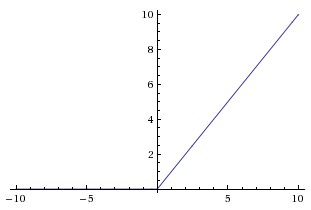
#### Why Relu is preffered?
It is Used because to prevent the gradients to become zero due to which when n hidden layers use an activation like the sigmoid function, n small derivatives are multiplied together. Thus, the gradient decreases exponentially as we propagate down to the initial layers and make the training of NN Hard and leads to inaccuracy. SO Relu prevent this Condition.

## Model-1

In [16]:
model1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(561, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6)
])

model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model1.fit(x1, y1, epochs=10)

#W12=[];
#for ln,l in enumerate(model1.layers):
 #   w=(l.get_weights());
  #  if(len(w)>0):
       #W12.append(w[0]);

W12=model1.get_weights();
W1=np.array(W12);

Epoch 1/10
115/115 [==============================] - 0s 1ms/step - loss: 0.6646 - accuracy: 0.7682
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.3743 - accuracy: 0.8890
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8879
Epoch 4/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2666 - accuracy: 0.9208
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2534 - accuracy: 0.9222
Epoch 6/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2318 - accuracy: 0.9263
Epoch 7/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2477 - accuracy: 0.9154
Epoch 8/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2009 - accuracy: 0.9377
Epoch 9/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1847 - accuracy: 0.9412
Epoch 10/10
115/115 [==============================] - 0s 1ms/step - loss: 0.1764 - accuracy: 0.9434

## Model-2

In [18]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(561, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6)
])

model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model2.fit(x2, y2, epochs=10)


W12=model2.get_weights();
W2=np.array(W12);

Epoch 1/10
115/115 [==============================] - 0s 1ms/step - loss: 0.6859 - accuracy: 0.7494
Epoch 2/10
115/115 [==============================] - 0s 1ms/step - loss: 0.3580 - accuracy: 0.8980
Epoch 3/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2922 - accuracy: 0.9186
Epoch 4/10
115/115 [==============================] - 0s 989us/step - loss: 0.2567 - accuracy: 0.9254
Epoch 5/10
115/115 [==============================] - 0s 1ms/step - loss: 0.2580 - accuracy: 0.9167
Epoch 6/10
115/115 [==============================] - 0s 963us/step - loss: 0.2056 - accuracy: 0.9393
Epoch 7/10
115/115 [==============================] - 0s 997us/step - loss: 0.1944 - accuracy: 0.9442
Epoch 8/10
115/115 [==============================] - 0s 954us/step - loss: 0.1782 - accuracy: 0.9467
Epoch 9/10
115/115 [==============================] - 0s 937us/step - loss: 0.1879 - accuracy: 0.9366
Epoch 10/10
115/115 [==============================] - 0s 971us/step - loss: 0.1660 - accu

## Using Average as Weight Function
we have taken average of the weights of the two models.

In [19]:
W=(W1+W2)/2.0;
print(W1.shape,'\n')
print(W2.shape,'\n')
print(W.shape,'\n')

(4,) 

(4,) 

(4,) 



## Final Evaluation
We have Used our test Data set here

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(561, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(6)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.set_weights(W)

In [21]:
res=model.evaluate(x_test,y_test);

93/93 [==============================] - 0s 922us/step - loss: 0.6482 - accuracy: 0.8394


## Acuuracy Score

In [23]:
print(res[1]*100,'%')

83.94433259963989 %
